# MNIST 데이터셋 이미지 분류

# imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt         # plt.plot(), ... 함수 사용하기 위해서
from matplotlib import image            # image.imsave(), image.imread(),... 함수 사용하기 위해서
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics  import confusion_matrix, classification_report

# python에서 이미지 다루기

In [3]:
china = datasets.load_sample_image('china.jpg')
#> 이미지 파일(jpg, png, ...) 읽어서 3차원 배열을 리턴.

In [4]:
type(china)

numpy.ndarray

In [5]:
china.shape

(427, 640, 3)

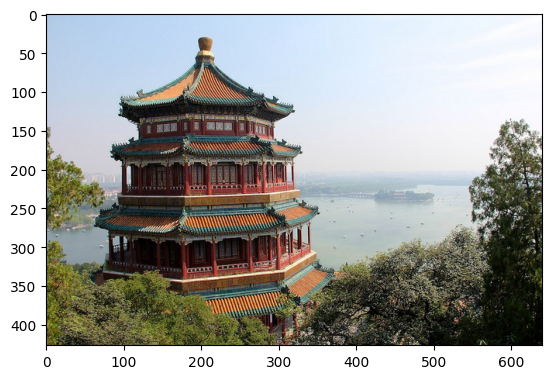

In [6]:
plt.imshow(china)
plt.show()

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]], dtype=uint8)
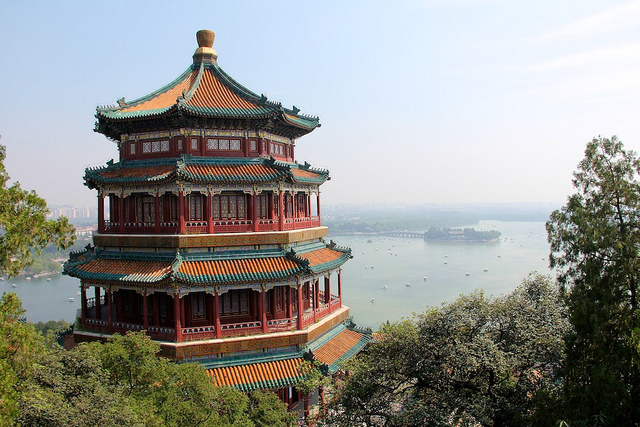

In [7]:
china

이미지 numpy ndarray

*   흑백 이미지인 경우, 이미지 배열 shape: (height, width)
*   컬러 이미지인 경우,
    *   불투명한 경우, 이미지 배열의 shape: (height, width, 3)      --> 3:RGB
    *   투명도가 있는 경우, 이미지 배열의 shape: (heigth, width, 4) --> 4:RGBA
*   이미지 배열의 숫자 스케일
    *   0 ~ 225 정수
    *   0.0 ~ 1.0 실수
    

*   matplotlib.image.imsave(fname, arr):
    *   파일 fname에 이미지 배열 arr을 이미지 형식(jpg, png,...)으로 변환해서 저장.
    *   ndarray --> jpg
*   matplotlib.image.imread(fname)
    *   이미지 파일 fname에서 이미지를 읽고 배열을 리턴.
    *   jpg --> ndarray

In [8]:
image.imsave('china_copy.jpg', china)

In [9]:
img_arr = image.imread('china_copy.jpg')

In [10]:
type(img_arr)

numpy.ndarray

이미지 배열에서 특정 색상(R/G/B) 제거

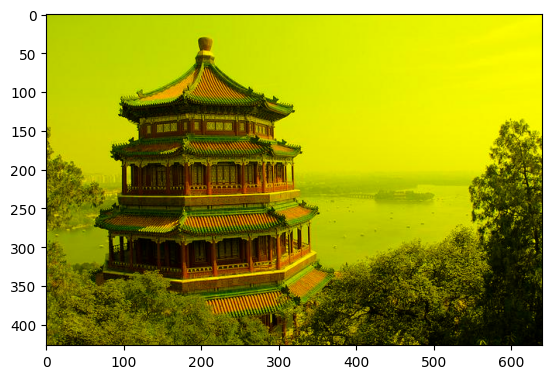

In [11]:
img_arr_copy = img_arr.copy()
img_arr_copy[:, :, 2] = 0           # Blue 색상을 제거
plt.imshow(img_arr_copy)
plt.show()

이미지 자르기 - 배열 slicing

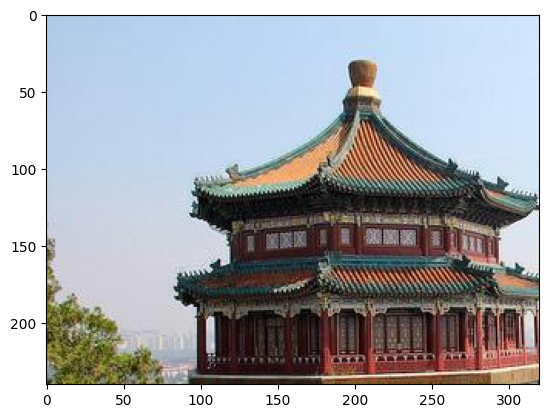

In [12]:
img_crop = img_arr[:240, :320, :]
plt.imshow(img_crop)
plt.show()

# MNIST 데이터셋

70,000개의 흑백 이미지(28x28)가 numpy 배열로 저장된 데이터 셋.

In [13]:
mnist = datasets.fetch_openml('mnist_784')

In [14]:
print(type(mnist))          # scikit-learn Bunch 클래스: dict 비슷

<class 'sklearn.utils._bunch.Bunch'>


In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
mnist.data          # (n_samples, n_features) = (70_000, 784) 모양의 데이터 프레임

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mnist.target        # (n_sample,) = (70_000,) 모양의 시리즈.

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [18]:
X = mnist.data.values.copy()     # 특성 배열
y = mnist.target.values.copy()  # 타겟 배열

In [19]:
X.shape

(70000, 784)

In [20]:
y.shape

(70000,)

## MNIST 데이터 시각화

In [21]:
image_0 = X[0].reshape((28,28))
image_0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

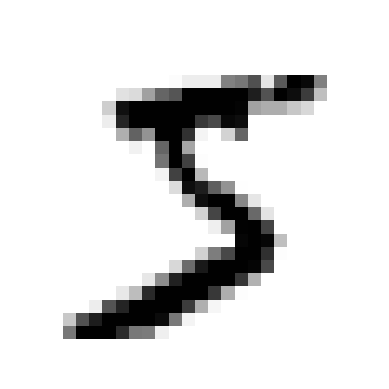

In [22]:
plt.imshow(image_0, cmap=plt.cm.binary)
# cmap = plt.cm.binary, cmap = 'binary': white(0) ~ black(225)
# cmap = plt.cm.gray, cmap = 'gray': black(0) ~ white(225)
plt.axis('off')
plt.show()

In [23]:
y[0]

'5'

이미지 100개를 10 X 10 Axes에 시각화

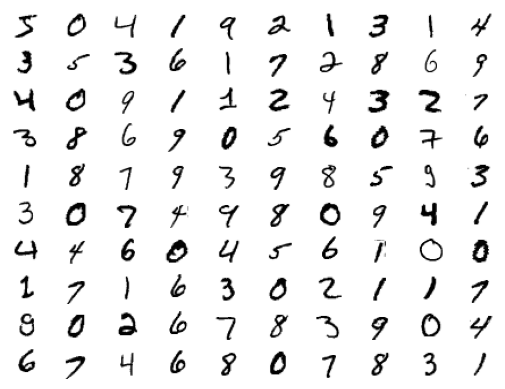

In [24]:
fig, axes = plt.subplots(nrows = 10, ncols = 10)
for i in range(10):
    for j in range(10):
        img = X[i * 10 + j].reshape((28,28))
        axes[i][j].imshow(img, cmap= 'binary')
        axes[i][j].axis('off')

plt.show()

In [25]:
y[:10]

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [26]:
y[70:80]

['1', '7', '1', '6', '3', '0', '2', '1', '1', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [27]:
np.unique(y, return_counts= True)       # 클래스들의 비율

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

# 훈련 셋/ 테스트 셋 나누기

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size= 10_000,
                                          random_state= 42,
                                          stratify= y)

# Logistic Regression

In [29]:
logistic = LogisticRegression()     # ML 모델 객체 생성

In [30]:
cv = cross_validate(estimator = logistic, X = X_tr, y = y_tr, n_jobs = -1,
                    return_train_score = True)

In [31]:
print('train score: ', np.mean(cv['train_score']))
print('validation score: ', np.mean(cv['test_score']))

train score:  0.9359958333333334
validation score:  0.91975


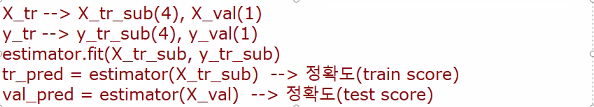

훈련 셋을 (작은) 훈련 셋과 검증 셋으로 구분하고 Logistic Regression을 훈련/ 평가.

In [32]:
X_tr_sub, X_val, y_tr_sub, y_val = train_test_split(X_tr, y_tr,
                                                    test_size = 0.2,
                                                    random_state=42,
                                                    stratify= y_tr)

In [33]:
logistic = LogisticRegression(max_iter = 1_000, n_jobs= -1)

In [34]:
logistic.fit(X_tr_sub, y_tr_sub)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [35]:
tr_sub_pred = logistic.predict(X_tr_sub)

In [36]:
cm_tr_sub = confusion_matrix(y_tr_sub, tr_sub_pred)
cm_tr_sub

array([[4652,    0,    9,    6,    3,   15,   16,    4,   22,    6],
       [   1, 5307,   19,   15,    5,    8,    1,   11,   29,    6],
       [  14,   25, 4450,   60,   38,   23,   39,   39,   96,    9],
       [   9,   12,   82, 4519,    6,  108,    9,   21,   88,   43],
       [   7,   15,   21,    7, 4452,    9,   17,   16,   22,  113],
       [  31,    9,   27,  121,   34, 3911,   56,    4,  110,   26],
       [  18,   11,   21,    2,   22,   40, 4578,    1,   22,    0],
       [   5,   11,   36,   13,   26,    4,    3, 4759,   14,  130],
       [  20,   49,   45,   93,   12,  108,   29,   12, 4274,   38],
       [  11,   13,    9,   57,   97,   18,    2,  101,   35, 4428]])

<Axes: >

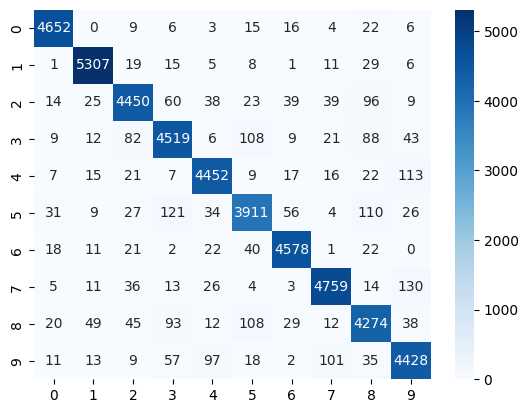

In [37]:
sns.heatmap(data = cm_tr_sub, cmap= 'Blues', annot = True, fmt= 'd')

In [38]:
np.fill_diagonal(cm_tr_sub, 0)


In [39]:
cm_tr_sub

array([[  0,   0,   9,   6,   3,  15,  16,   4,  22,   6],
       [  1,   0,  19,  15,   5,   8,   1,  11,  29,   6],
       [ 14,  25,   0,  60,  38,  23,  39,  39,  96,   9],
       [  9,  12,  82,   0,   6, 108,   9,  21,  88,  43],
       [  7,  15,  21,   7,   0,   9,  17,  16,  22, 113],
       [ 31,   9,  27, 121,  34,   0,  56,   4, 110,  26],
       [ 18,  11,  21,   2,  22,  40,   0,   1,  22,   0],
       [  5,  11,  36,  13,  26,   4,   3,   0,  14, 130],
       [ 20,  49,  45,  93,  12, 108,  29,  12,   0,  38],
       [ 11,  13,   9,  57,  97,  18,   2, 101,  35,   0]])

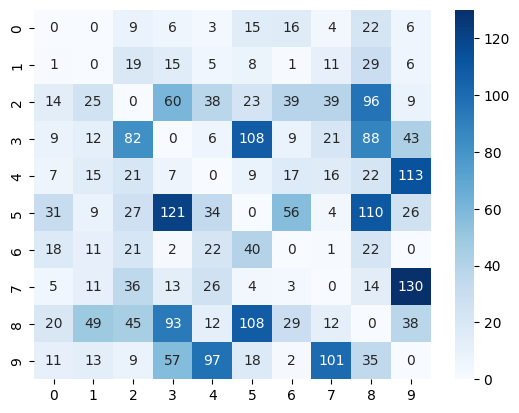

In [40]:
sns.heatmap(data = cm_tr_sub, cmap= 'Blues', annot = True, fmt= 'd')
plt.show()

## 예측이 틀린 훈련 샘플들

In [41]:
X_wrong = X_tr_sub[y_tr_sub != tr_sub_pred]         # 예측이 틀린 훈련 샘플

In [42]:
X_wrong.shape

(2670, 784)

In [43]:
y_wrong = y_tr_sub[y_tr_sub != tr_sub_pred]         # 예측이 틀린 훈련 샘플의 클래스

In [44]:
pred_wrong = tr_sub_pred[y_tr_sub != tr_sub_pred]   # 틀린 예측값들

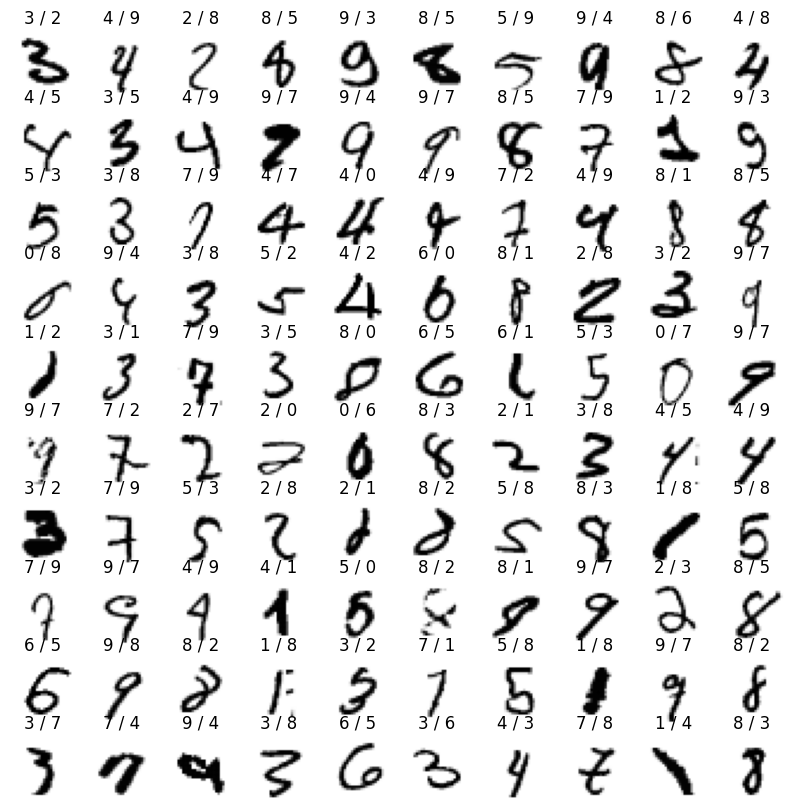

In [45]:
fig, axes = plt.subplots(nrows= 10, ncols = 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        img= X_wrong[i*10 + j ]. reshape(28,28)
        axes[i][j].imshow(img, cmap = 'binary')
        axes[i][j].axis('off')
        axes[i][j].set_title(f'{y_wrong[i * 10 + j]} / {pred_wrong[i *10 +j]}')

plt.show()

In [46]:
print(classification_report(y_tr_sub, tr_sub_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4733
           1       0.97      0.98      0.98      5402
           2       0.94      0.93      0.94      4793
           3       0.92      0.92      0.92      4897
           4       0.95      0.95      0.95      4679
           5       0.92      0.90      0.91      4329
           6       0.96      0.97      0.97      4715
           7       0.96      0.95      0.95      5001
           8       0.91      0.91      0.91      4680
           9       0.92      0.93      0.93      4771

    accuracy                           0.94     48000
   macro avg       0.94      0.94      0.94     48000
weighted avg       0.94      0.94      0.94     48000



In [47]:
val_pred = logistic.predict(X_val)

In [48]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1184
           1       0.94      0.97      0.96      1350
           2       0.90      0.86      0.88      1198
           3       0.90      0.89      0.89      1224
           4       0.92      0.90      0.91      1170
           5       0.90      0.86      0.88      1082
           6       0.93      0.94      0.94      1179
           7       0.93      0.92      0.93      1250
           8       0.87      0.88      0.87      1170
           9       0.87      0.92      0.90      1193

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



# KNN Classifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_tr_sub, y_tr_sub)

KNeighborsClassifier()

In [51]:
tr_sub_pred = knn.predict(X_tr_sub)

In [52]:
print(classification_report(y_tr_sub, tr_sub_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.97      1.00      0.98      5402
           2       0.99      0.97      0.98      4793
           3       0.98      0.98      0.98      4897
           4       0.99      0.98      0.98      4679
           5       0.98      0.97      0.97      4329
           6       0.98      0.99      0.99      4715
           7       0.98      0.98      0.98      5001
           8       0.99      0.96      0.97      4680
           9       0.97      0.98      0.97      4771

    accuracy                           0.98     48000
   macro avg       0.98      0.98      0.98     48000
weighted avg       0.98      0.98      0.98     48000



In [53]:
val_pred = knn.predict(X_val)

In [54]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1184
           1       0.96      0.99      0.98      1350
           2       0.99      0.97      0.98      1198
           3       0.97      0.97      0.97      1224
           4       0.98      0.95      0.97      1170
           5       0.96      0.97      0.96      1082
           6       0.99      0.99      0.99      1179
           7       0.97      0.98      0.97      1250
           8       0.99      0.94      0.96      1170
           9       0.95      0.96      0.96      1193

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

